# Studying the Airbnb Dynamics in Barcelona - PART I


Barcelona has long been facing serious challenges related to tourism. Over the past years, the city has become a hotspot for global travelers, which has significantly altered the housing landscape. Increasingly, private property owners are finding it more profitable to rent out their apartments to tourists rather than to local residents. At the same time, real estate agencies are purchasing residential properties and converting them into short-term tourist accommodations.

This dynamic contributes to: 
- **A reduced supply of housing for locals**
- **An increase of rental prices**
- **Expulsion of the residents out of central neighborhoods into more suburban areas** — often leaving the city center dominated by tourists.

Given this context, and considering that Airbnb is one of the most widely used platforms for short-term rentals, I decided to explore its role in shaping the housing situation in Barcelona in a series of reports and analysis of the data. 

This analysis aims to:
1. Evaluate the impact of Airbnb on the local housing market.
2. Understand the dynamics of the platform.
3. Analyze the profile of property owners listing accommodations.
4. Examine the characteristics of the user base.

## The Data

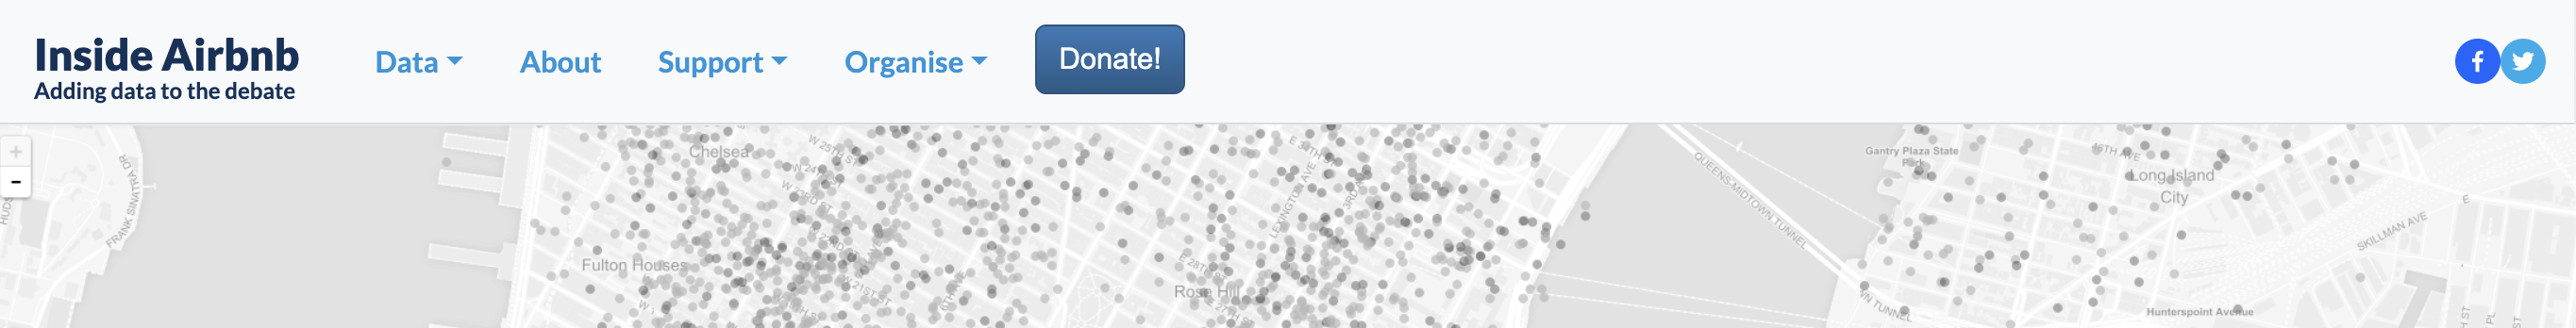

- **Data Source:** Data used in this project was obtained from [Inside Airbnb](https://insideairbnb.com/), which provides data to help understand the impact of Airbnb on residential communities. The data used for the analysis corresponds to the city of [Barcelona](https://insideairbnb.com/barcelona/). 
- The data is © Inside Airbnb and used under their [Data Policies](https://insideairbnb.com/data-policies/).
- This project is not affiliated with or endorsed by Inside Airbnb. 
- All analysis and conclusions extracted from the Analysis are my own. 

## Getting the data

Go to the main page of Inside Airbnb [get  the data section](https://insideairbnb.com/get-the-data/) and donwload the listings.csv.gz zipped file from Barcelona. 

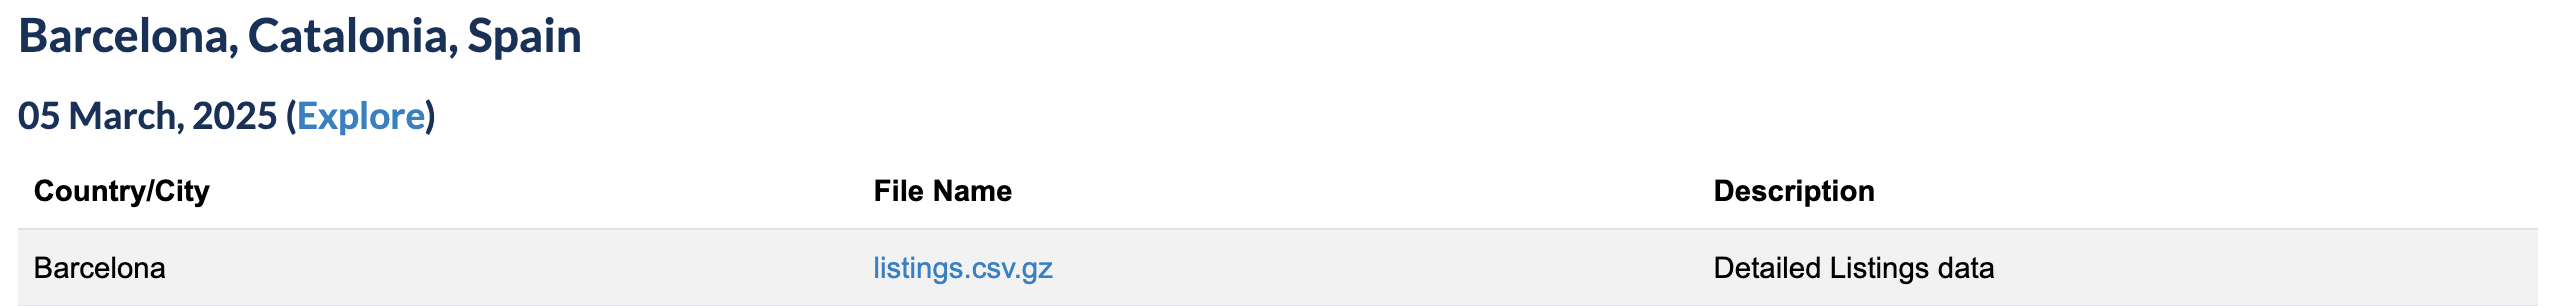

Then unzip the file, create  data folder in your directory and place the csv file. The directory structure should look something like this: 

```
LearnDs.ai - Simple Analytical Project/
├── data/
│   └── [your raw/processed dataset files go here]
└──  PartI - Cleaning the Data.ipynb
```


## Preprocessing & Understanding the data

### Creating your own virtual environment
A virtual environment keeps your project’s dependencies isolated — so different projects don’t interfere with each other (especially with different library versions).

In [ ]:
# 1. Create a virtual environment (you can name it "venv" or anything you like)
! python -m venv venv

# 2. Activate it:
# On macOS/Linux:
! source venv/bin/activate

# On Windows:
! venv\Scripts\activate

# 3. Install your project libraries
! pip install pandas matplotlib seaborn jupyter

# 4. (Optional) Save dependencies
! pip freeze > requirements.txt

### Preparing our environment

In [1]:
!pip install numpy pandas matplotlib langdetect shapely seaborn scipy geopandas


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization   
import os # to internact with our computer
from langdetect import detect # To detect the language of each record
import numpy as np

In [3]:
# Checking the directory with the data
for dirname, _, filenames in os.walk("data"):
    for filename in filenames: 
        print(os.path.join(dirname, filename))

data/reviews.csv
data/listings_lite.csv
data/.DS_Store
data/amenities.csv
data/neighbourhoods.geojson
data/neighbourhoods.csv
data/listings.csv
data/calendar.csv
data/reviews_summary.csv
data/listings_summary.csv


Explain briefly all the information

### Understanding the data - Listings Table

1. Listing Information
- `id`: Unique identifier for the listing.
- `listing_url`: URL of the Airbnb listing.
- `scrape_id`: Identifier for the web scraping session.
- `last_scraped`: The last date the data was scraped.
- `source`: Source of the listing data (e.g., "city scrape").
- `name`: Title of the listing.
- `description`: Detailed description of the listing.
- `neighborhood_overview`: Short description of the surrounding area.
- `picture_url`: URL of the main listing image.

2. Host Information
- `host_id`: Unique identifier for the host.
- `host_url`: URL to the host's Airbnb profile.
- `host_name`: Name of the host.
- `host_since`: Date when the host joined Airbnb.
- `host_location`: Location of the host.
- `host_about`: Host's self-description.
- `host_response_time`: Typical response time to guest inquiries.
- `host_response_rate`: Percentage of inquiries the host responds to.
- `host_acceptance_rate`: Percentage of bookings the host accepts.
- `host_is_superhost`: Whether the host is a Superhost (True/False).
- `host_thumbnail_url`: Profile image URL (thumbnail).
- `host_picture_url`: Profile image URL (full).
- `host_neighbourhood`: Host's specified neighborhood.
- `host_listings_count`: Number of listings the host has.
- `host_total_listings_count`: Total number of listings for the host.
- `host_verifications`: List of verification methods used by the host.
- `host_has_profile_pic`: Whether the host has a profile picture (True/False).
- `host_identity_verified`: Whether the host has verified their identity (True/False).

3. Location & Neighborhood
- `neighbourhood`: Name of the general area.
- `neighbourhood_cleansed`: Standardized version of the neighborhood name.
- `neighbourhood_group_cleansed`: Larger regional grouping (if available).
- `latitude`: Latitude coordinate of the listing.
- `longitude`: Longitude coordinate of the listing.

4. Property & Room Details
- `property_type`: Type of property (e.g., "Apartment", "House").
- `room_type`: Type of room being rented ("Entire home", "Private room", etc.).
- `accommodates`: Maximum number of guests.
- `bathrooms`: Number of bathrooms (numeric).
- `bathrooms_text`: Text description of bathrooms (e.g., "1.5 baths").
- `bedrooms`: Number of bedrooms.
- `beds`: Number of beds.
- `amenities`: List of amenities available (WiFi, Kitchen, etc.).
- `price`: Nightly price (stored as a string, likely needs conversion to numeric).

5. Availability & Booking Restrictions
- `minimum_nights`: Minimum number of nights required for a booking.
- `maximum_nights`: Maximum number of nights allowed for a booking.
- `minimum_minimum_nights`: Minimum required stay for specific periods.
- `maximum_minimum_nights`: Maximum required stay for specific periods.
- `minimum_maximum_nights`: Smallest maximum stay allowed.
- `maximum_maximum_nights`: Largest maximum stay allowed.
- `minimum_nights_avg_ntm`: Average minimum nights required.
- `maximum_nights_avg_ntm`: Average maximum nights allowed.
- `calendar_updated`: How recently the calendar was updated (all values NaN in this dataset).
- `has_availability`: Whether the listing has availability (True/False).
- `availability_30`: Number of available nights in the next 30 days.
- `availability_60`: Number of available nights in the next 60 days.
- `availability_90`: Number of available nights in the next 90 days.
- `availability_365`: Number of available nights in the next year.
- `calendar_last_scraped`: Date when the calendar was last updated.

6. Reviews & Ratings
- `number_of_reviews`: Total number of reviews.
- `number_of_reviews_ltm`: Reviews in the last 12 months.
- `number_of_reviews_l30d`: Reviews in the last 30 days.
- `first_review`: Date of the first review.
- `last_review`: Date of the most recent review.
- `review_scores_rating`: Overall rating (out of 5).
- `review_scores_accuracy`: Rating for accuracy.
- `review_scores_cleanliness`: Rating for cleanliness.
- `review_scores_checkin`: Rating for the check-in process.
- `review_scores_communication`: Rating for communication.
- `review_scores_location`: Rating for location.
- `review_scores_value`: Rating for value for money.
- `reviews_per_month`: Average number of reviews per month.

7. Legal & Instant Booking
- `license`: License number for the listing.
- `instant_bookable`: Whether the listing can be booked instantly (True/False).

8. Host Listing Count (Aggregated)
- `calculated_host_listings_count`: Total listings the host has.
- `calculated_host_listings_count_entire_homes`: Entire homes/apartments hosted.
- `calculated_host_listings_count_private_rooms`: Private rooms hosted.
- `calculated_host_listings_count_shared_rooms`: Shared rooms hosted.



In [4]:
# We define our used colors:
# Or use a custom palette
yellow = '#EDC948'
green = '#4E79A7'
blue = '#59A14F'
red = '#E15759'

# Or use a custom palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[yellow, green, blue, red])

### Cleaning & Preprocessing the data
After doing some exploration of the listings table, we osbserve some issues that need to be assessed: 
1. The `price` column contains a symbol and has as a type text. We need to convert it into a float withour any currency symbol (and remember it is in dollars).
2. 

In [5]:
listings_df = pd.read_csv(
    'data/listings.csv',
    low_memory=False,        # We force pandas to read first all the CSV before inferring datatypes so there are no unconsistencies
    true_values=['t'],       # we convert any t in boolean variables as TRUE
    false_values=['f'],      # we convert any f in boolean variables as FALSE 
    na_values=[None, 'none'] # We convert any None or 'none' as NAN
    )

listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20241212051318,2024-12-12,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.70,4.80,4.32,HUTB-002062,True,29,29,0,0,0.32
1,23197,https://www.airbnb.com/rooms/23197,20241212051318,2024-12-12,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.63,4.65,HUTB005057,False,1,1,0,0,0.48


In [6]:
print(f"- Example 1: The original format of the price is {listings_df['price'].values[0]}")

- Example 1: The original format of the price is $119.00


Now we need to implement some cleansing...

In [7]:
# CLEANING I --------------------------------------------------------------------------------------------------------------
# Convert price into a float without symbols

original_price = listings_df[['price']].values[0][0]
cleansed_price = float(listings_df[['price']].values[0][0][1:].replace(',',''))

print(f"We need to convert {0} into a float value without currency symbol like {1}".format(original_price, cleansed_price))

listings_df[['price']] = (
    listings_df[['price']]
    .apply(lambda col: (
        col
        .str[1:]
        .str.replace(',', '')
        .apply(float)))
    .fillna(0))

We need to convert 0 into a float value without currency symbol like 1


In [8]:
# CLEANING II --------------------------------------------------------------------------------------------------------------
# Count the number of amenities per listing

listings_df['n_amenities'] = (
    listings_df['amenities']
    .str[1:-1]
    .str.replace("\"", '')
    .str.split(',')
    .apply(len))

In [9]:
# CLEANING II) --------------------------------------------------------------------------------------------------------------
# Generate a new table containing all available amenities

amenities_ser = (
    listings_df
    .set_index('id')
    ['amenities']
    .str[1:-1]
    .str.replace("\"", '')
    .str.split(',', expand=True)
    .stack())

amenities_df = pd.DataFrame(amenities_ser)
amenities_df.to_csv("data/amenities.csv")
amenities_df

0
id                                                         
18674               0                          Refrigerator
                    1                            30 inch TV
                    2                   Free street parking
                    3                            Essentials
                    4                              Elevator
...                                                     ...
1309262897444115631 18                                 Crib
                    19                           Hair dryer
                    20   Noise decibel monitors on property
                    21                                 Iron
                    22                         Coffee maker

[514148 rows x 1 columns]

In [10]:
# Creating new columns

listings_df['minimum_cost'] = (
    listings_df['price'] * 
    listings_df['minimum_nights'])

listings_df['minimum_cost_per_night'] = (
    listings_df['minimum_cost'] /
    listings_df['minimum_nights'])

listings_df['minimum_cost_per_night_and_person'] = (
    np.round(
        listings_df['minimum_cost_per_night'] /
        listings_df['accommodates'], 2))

listings_df['accommodates_group'] = (
    listings_df['accommodates']
    .pipe(pd.cut, bins=[1,2,3,5,20], include_lowest=True, right=False, 
          labels=['Single', 'Couple', 'Family', 'Group']))

host_properties_counts = (
    listings_df
    .groupby('host_id')
    .size()
    .sort_values()
)

host_apts_counts = (
    listings_df[listings_df['room_type'].isin(['Entire home/apt'])]
    .groupby('host_id')
    .size()
    .sort_values()
)

# Map the computed values to the original DataFrame, filling NaN values with 0
listings_df['number_of_apts'] = listings_df['host_id'].map(host_apts_counts).fillna(0).astype(int)
listings_df['number_of_properties'] = listings_df['host_id'].map(host_properties_counts).fillna(0).astype(int)

# Generate a new column with the language of the advertisment
def mydetect(text):
    try:
        return detect(text)
    except:
        return np.nan
    
listings_df['lang'] = listings_df['name'].apply(mydetect)

In [11]:
listings_lite_df = listings_df[[
    'id', 'host_id', 'listing_url', 'room_type', 'neighbourhood_group_cleansed', 
    'price', 'accommodates', 'accommodates_group',
    'minimum_nights', 'minimum_cost', 
    'minimum_cost_per_night', 'minimum_cost_per_night_and_person',
    'n_amenities', 'review_scores_rating', 
    'latitude', 'longitude', 'number_of_apts', 'number_of_properties','lang']].copy()

listings_lite_df.to_csv("data/listings_lite.csv")
